In [2]:
import ctypes
import os
import threading
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
matplotlib.style.use('ggplot')
import math
import concurrent.futures
import glob
import json
import scipy as sp
import scipy.special
from matplotlib.ticker import FormatStrFormatter

In [3]:
#old code to be repurposed 

In [4]:
#shift parameter - draw many lines - change colors gradually 
#maybe highlight central point

In [5]:
theta = np.array([1.5, 2.0, 0.02, 0.5])

In [6]:
I = 50000

In [7]:
def p_switch(I, irr):
    p = 1 / (1 + math.exp(- (irr * theta[3] - 1 / (theta[1]) * math.pow(1 + theta[0]/theta[1] * I / 1000, - 1 / (1 + theta[0])))/ (theta[2])))
    if (p > 1.0):
        p = 1.0
    return p

In [8]:
def p_switch_p0(param, irr):
    p = 1 / (1 + math.exp(- (irr * theta[3] - 1 / (theta[1]) * math.pow(1 + param/theta[1] * I / 1000, - 1 / (1 + param)))/ (theta[2])))
    if (p > 1.0):
        p = 1.0
    return p

In [9]:
def p_switch_p1(param, irr):
    p = 1 / (1 + math.exp(- (irr * theta[3] - 1 / (param) * math.pow(1 + theta[0]/param * I / 1000, - 1 / (1 + theta[0])))/ (theta[2])))
    if (p > 1.0):
        p = 1.0
    return p

In [10]:
def p_switch_p2(param, irr):
    p = 1 / (1 + math.exp(- (irr * theta[3] - 1 / (theta[1]) * math.pow(1 + theta[0]/theta[1] * I / 1000, - 1 / (1 + theta[0])))/ (param)))
    if (p > 1.0):
        p = 1.0
    return p

In [11]:
def p_switch_p3(param, irr):
    p = 1 / (1 + math.exp(- (irr * param - 1 / (theta[1]) * math.pow(1 + theta[0]/theta[1] * I / 1000, - 1 / (1 + theta[0])))/ (theta[2])))
    if (p > 1.0):
        p = 1.0
    return p

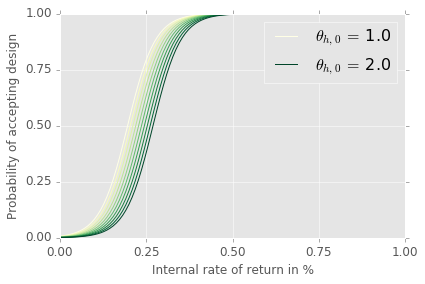

In [12]:
fig, host = plt.subplots()


N_BINS = 10

params = np.linspace(1.0, 2.0, num=N_BINS)
irrs = np.linspace(0.0, 0.9, num=100)
y = np.zeros((10,100))

i = 0
for param in params:
    j = 0
    for irr in irrs:
        y[i, j] = p_switch_p0(param, irr)
        j = j + 1
    i = i + 1

lines = []


norm = matplotlib.colors.Normalize(vmin=0, vmax=N_BINS - 1)
cmap_custom = cm.get_cmap('YlGn')
incomes = norm(range(N_BINS))
colors = []

for income_ in incomes:
    colors.append(cmap_custom(income_))

for i in range(10):
    lines.append(host.plot(irrs, y[i], color=colors[i])[0])

param_to_show = params
param_to_show_num = []
for i in range(len(param_to_show)):
    param_to_show_num.append((param_to_show[i]))
    
    
lines_to_show = [lines[0], lines[-1]]
labels = ["{}{}".format(*items) for items in zip([r'$\theta_{h,0}\:=\:$'] * len(params), param_to_show_num)]
labels_to_show = [labels[0], labels[-1]]


host.legend(lines_to_show, labels_to_show, fontsize='16')


host.set_xlabel("Internal rate of return in %")
host.set_ylabel("Probability of accepting design")
#host.set_title('Probability distributions given \n the rate of return \n by the level of income', fontsize=10)

#changing ticks
host.set_autoscaley_on(False)
host.set_xlim([0.0,1.0])
start = 0.0
end = 1.0
host.xaxis.set_ticks(np.arange(start, end + 0.01, 0.25))
for tick in host.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

host.set_autoscaley_on(False)
host.set_ylim([0.0,1.0])
start = 0.0
end = 1.0
host.yaxis.set_ticks(np.arange(start, end + 0.01, 0.25))
for tick in host.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)


plt.tight_layout()
plt.savefig('Simulation_results_' + 'preferences_' + 'param0' + '.png', dpi=300)

plt.show()

In [13]:
#just different parameters - separate graphs

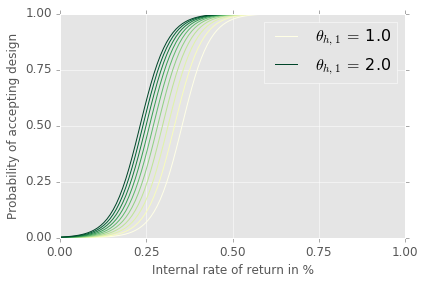

In [14]:
fig, host = plt.subplots()


N_BINS = 10

params = np.linspace(1.0, 2.0, num=N_BINS)
irrs = np.linspace(0.0, 0.9, num=100)
y = np.zeros((10,100))

i = 0
for param in params:
    j = 0
    for irr in irrs:
        y[i, j] = p_switch_p1(param, irr)
        j = j + 1
    i = i + 1

lines = []


norm = matplotlib.colors.Normalize(vmin=0, vmax=N_BINS - 1)
cmap_custom = cm.get_cmap('YlGn')
incomes = norm(range(N_BINS))
colors = []

for income_ in incomes:
    colors.append(cmap_custom(income_))

for i in range(10):
    lines.append(host.plot(irrs, y[i], color=colors[i])[0])

param_to_show = params
param_to_show_num = []
for i in range(len(param_to_show)):
    param_to_show_num.append((param_to_show[i]))
    
    
lines_to_show = [lines[0], lines[-1]]
labels = ["{}{}".format(*items) for items in zip([r'$\theta_{h,1}\:=\:$'] * len(params), param_to_show_num)]
labels_to_show = [labels[0], labels[-1]]


host.legend(lines_to_show, labels_to_show, fontsize='16')


host.set_xlabel("Internal rate of return in %")
host.set_ylabel("Probability of accepting design")
#host.set_title('Probability distributions given \n the rate of return \n by the level of income', fontsize=10)


#changing ticks
host.set_autoscaley_on(False)
host.set_xlim([0.0,1.0])
start = 0.0
end = 1.0
host.xaxis.set_ticks(np.arange(start, end + 0.01, 0.25))
for tick in host.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

host.set_autoscaley_on(False)
host.set_ylim([0.0,1.0])
start = 0.0
end = 1.0
host.yaxis.set_ticks(np.arange(start, end + 0.01, 0.25))
for tick in host.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)

plt.tight_layout()
plt.savefig('Simulation_results_' + 'preferences_' + 'param1' + '.png', dpi=300)

plt.show()

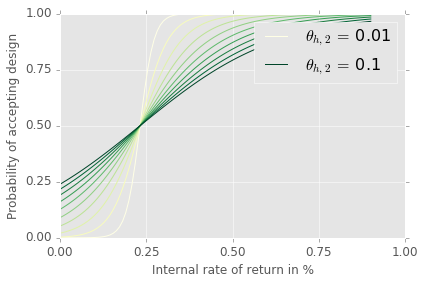

In [15]:
fig, host = plt.subplots()


N_BINS = 10

params = np.linspace(0.01, 0.1, num=N_BINS)
irrs = np.linspace(0.0, 0.9, num=100)
y = np.zeros((10,100))

i = 0
for param in params:
    j = 0
    for irr in irrs:
        y[i, j] = p_switch_p2(param, irr)
        j = j + 1
    i = i + 1

lines = []


norm = matplotlib.colors.Normalize(vmin=0, vmax=N_BINS - 1)
cmap_custom = cm.get_cmap('YlGn')
incomes = norm(range(N_BINS))
colors = []

for income_ in incomes:
    colors.append(cmap_custom(income_))

for i in range(10):
    lines.append(host.plot(irrs, y[i], color=colors[i])[0])

param_to_show = params
param_to_show_num = []
for i in range(len(param_to_show)):
    param_to_show_num.append((param_to_show[i]))
    
    
lines_to_show = [lines[0], lines[-1]]
labels = ["{}{}".format(*items) for items in zip([r'$\theta_{h,2}\:=\:$'] * len(params), param_to_show_num)]
labels_to_show = [labels[0], labels[-1]]


host.legend(lines_to_show, labels_to_show, fontsize='16')


host.set_xlabel("Internal rate of return in %")
host.set_ylabel("Probability of accepting design")
#host.set_title('Probability distributions given \n the rate of return \n by the level of income', fontsize=10)


#changing ticks
host.set_autoscaley_on(False)
host.set_xlim([0.0,1.0])
start = 0.0
end = 1.0
host.xaxis.set_ticks(np.arange(start, end + 0.01, 0.25))
for tick in host.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

host.set_autoscaley_on(False)
host.set_ylim([0.0,1.0])
start = 0.0
end = 1.0
host.yaxis.set_ticks(np.arange(start, end + 0.01, 0.25))
for tick in host.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)

plt.tight_layout()
plt.savefig('Simulation_results_' + 'preferences_' + 'param2' + '.png', dpi=300)

plt.show()

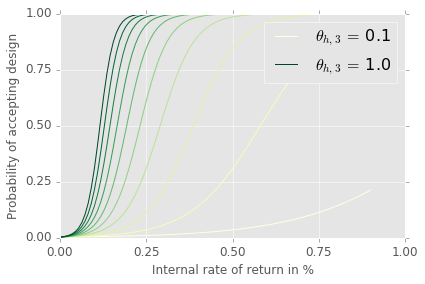

In [16]:
fig, host = plt.subplots()


N_BINS = 10

params = np.linspace(0.1, 1.0, num=N_BINS)
irrs = np.linspace(0.0, 0.9, num=100)
y = np.zeros((10,100))

i = 0
for param in params:
    j = 0
    for irr in irrs:
        y[i, j] = p_switch_p3(param, irr)
        j = j + 1
    i = i + 1

lines = []


norm = matplotlib.colors.Normalize(vmin=0, vmax=N_BINS - 1)
cmap_custom = cm.get_cmap('YlGn')
incomes = norm(range(N_BINS))
colors = []

for income_ in incomes:
    colors.append(cmap_custom(income_))

for i in range(10):
    lines.append(host.plot(irrs, y[i], color=colors[i])[0])

param_to_show = params
param_to_show_num = []
for i in range(len(param_to_show)):
    param_to_show_num.append((param_to_show[i]))
    
    
    
    
lines_to_show = [lines[0], lines[-1]]
labels = ["{}{}".format(*items) for items in zip([r'$\theta_{h,3}\:=\:$'] * len(params), param_to_show_num)]
labels_to_show = [labels[0], labels[-1]]


host.legend(lines_to_show, labels_to_show, fontsize='16')



host.set_xlabel("Internal rate of return in %")
host.set_ylabel("Probability of accepting design")
#host.set_title('Probability distributions given \n the rate of return \n by the level of income', fontsize=10)


#changing ticks
host.set_autoscaley_on(False)
host.set_xlim([0.0,1.0])
start = 0.0
end = 1.0
host.xaxis.set_ticks(np.arange(start, end + 0.01, 0.25))
for tick in host.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

host.set_autoscaley_on(False)
host.set_ylim([0.0,1.0])
start = 0.0
end = 1.0
host.yaxis.set_ticks(np.arange(start, end + 0.01, 0.25))
for tick in host.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)



plt.tight_layout()
plt.savefig('Simulation_results_' + 'preferences_' + 'param3' + '.png', dpi=300)

plt.show()

In [28]:
theta = np.array([1.5, 2.0, 0.02, 0.5])

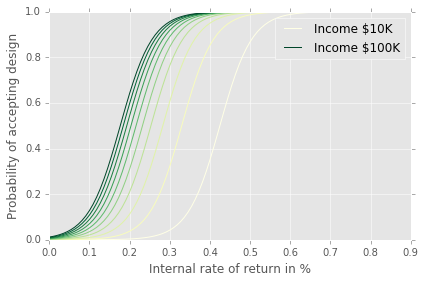

In [29]:
fig, host = plt.subplots()


N_BINS = 10

params = np.linspace(10000.0, 100000.0, num=N_BINS)
irrs = np.linspace(0.0, 0.9, num=100)
y = np.zeros((10,100))

i = 0
for param in params:
    j = 0
    for irr in irrs:
        y[i, j] = p_switch(param, irr)
        j = j + 1
    i = i + 1

lines = []


norm = matplotlib.colors.Normalize(vmin=0, vmax=N_BINS - 1)
cmap_custom = cm.get_cmap('YlGn')
incomes = norm(range(N_BINS))
colors = []

for income_ in incomes:
    colors.append(cmap_custom(income_))

for i in range(10):
    lines.append(host.plot(irrs, y[i], color=colors[i])[0])

param_to_show = params
param_to_show_num = []
for i in range(len(param_to_show)):
    param_to_show_num.append(int(param_to_show[i]/1000))
    
    
lines_to_show = [lines[0], lines[-1]]
labels = ["{}{}{}".format(*items) for items in zip(['Income $'] * len(params), param_to_show_num, ['K'] * len(param_to_show))]
labels_to_show = [labels[0], labels[-1]]


host.legend(lines_to_show, labels_to_show)


host.set_xlabel("Internal rate of return in %")
host.set_ylabel("Probability of accepting design")
#host.set_title('Probability distributions given \n the rate of return \n by the level of income', fontsize=10)

plt.tight_layout()
plt.savefig('Simulation_results_' + 'preferences_' + 'income' + '.png', dpi=300)

plt.show()